<a href="https://colab.research.google.com/github/rukevweubio/Data-Analysis-Ordershipment/blob/main/hello.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
import datetime as datetime
import time
import pandas as pd
import numpy as np

os.environ['KAGGLE_CONFIG_DIR']='/content'

import the kaggle Api key to dwonload the dataset from kaggle

In [4]:
!kaggle datasets download -d akshatagrawal9431/shipment-orders-dataset

Dataset URL: https://www.kaggle.com/datasets/akshatagrawal9431/shipment-orders-dataset
License(s): CC0-1.0
shipment-orders-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


Read the dataset into Dataframe with pandas

In [5]:
df = pd.read_csv('shipment-orders-dataset.zip')
df.head()

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
0,1,01-03-2023,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,15-08-2023,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,10-01-2023,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,18-06-2022,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,13-07-2022,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5


the total column  and row in the datset

In [6]:

df.columns

Index(['Order Id', 'Order Date', 'Ship Mode', 'Segment', 'Country', 'City',
       'State', 'Postal Code', 'Region', 'Category', 'Sub Category',
       'Product Id', 'cost price', 'List Price', 'Quantity',
       'Discount Percent'],
      dtype='object')

In [7]:
df.shape

(9994, 16)

In [8]:
df.describe()

,Order Id,Postal Code,cost price,List Price,Quantity,Discount Percent
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,201.189714,229.756854,3.789574,3.484090
std,2885.163629,32063.693350,537.743203,623.245839,2.225110,1.114211
min,1.000000,1040.000000,0.000000,0.000000,1.000000,2.000000
25%,2499.250000,23223.000000,20.000000,20.000000,2.000000,2.000000
50%,4997.500000,56430.500000,50.000000,50.000000,3.000000,3.000000
75%,7495.750000,90008.000000,180.000000,210.000000,5.000000,4.000000
max,9994.000000,99301.000000,18110.000000,22640.000000,14.000000,5.000000


the datatype of the dataframe

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order Id          9994 non-null   int64 
 1   Order Date        9994 non-null   object
 2   Ship Mode         9993 non-null   object
 3   Segment           9994 non-null   object
 4   Country           9994 non-null   object
 5   City              9994 non-null   object
 6   State             9994 non-null   object
 7   Postal Code       9994 non-null   int64 
 8   Region            9994 non-null   object
 9   Category          9994 non-null   object
 10  Sub Category      9994 non-null   object
 11  Product Id        9994 non-null   object
 12  cost price        9994 non-null   int64 
 13  List Price        9994 non-null   int64 
 14  Quantity          9994 non-null   int64 
 15  Discount Percent  9994 non-null   int64 
dtypes: int64(6), object(10)
memory usage: 1.2+ MB


check for missing values

In [10]:
df.isnull().sum()

Order Id            0
Order Date          0
Ship Mode           1
Segment             0
Country             0
City                0
State               0
Postal Code         0
Region              0
Category            0
Sub Category        0
Product Id          0
cost price          0
List Price          0
Quantity            0
Discount Percent    0
dtype: int64

check the column with the missing data

In [11]:
df['Ship Mode'].unique()
cols=['Not Available', 'unknown','nan']
for i in cols:
  if i in df['Ship Mode'].unique():
    df['Ship Mode']=df['Ship Mode'].replace(i,np.nan)
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', nan, 'First Class', 'Same Day'],
      dtype=object)

Priceof shipping

In [12]:
df['Sellingprice']=df['List Price']-df['List Price']*df['Discount Percent']*0.01
df['Sellingprice'].head()


0    254.8
1    708.1
2      9.5
3    940.8
4     19.0
Name: Sellingprice, dtype: float64

In [13]:
df['Profit'] = df['Sellingprice']-df['cost price']
df['Profit'].head()

0     14.8
1    108.1
2     -0.5
3    160.8
4     -1.0
Name: Profit, dtype: float64

In [14]:
df['Totalprofit']=df['Profit']*df['Quantity']
df['Totalprofit'].head()

0     29.6
1    324.3
2     -1.0
3    804.0
4     -2.0
Name: Totalprofit, dtype: float64

drop the list price columns sinec we have gotten the ordering price

check the orderdate columns

In [16]:
df['year']=pd.to_datetime(df['Order Date'],format='%d-%m-%Y').dt.year
df['monthname']=pd.to_datetime(df['Order Date'],format='%d-%m-%Y').dt.month_name()
df['dayname']=pd.to_datetime(df['Order Date'],format='%d-%m-%Y').dt.day_name()
df['month']=pd.to_datetime(df['Order Date'],format='%d-%m-%Y').dt.month
df['day']=pd.to_datetime(df['Order Date'],format='%d-%m-%Y').dt.day

In [17]:
df.drop(columns=['Order Date'],inplace=True)

## Top highest profit generated category

In [108]:
df.groupby('Category')['Profit'].sum().sort_values(ascending=False).head().reset_index()

,Category,Profit
0,Technology,76433.5
1,Furniture,66480.7
2,Office Supplies,62254.5


Top 10 highest profit generated product

In [19]:
df.groupby('Product Id' )['Totalprofit'].sum(['Totalprofit']).sort_values(ascending=False).head(10)

Product Id
TEC-CO-10004722    24816.0
TEC-MA-10002412    21746.4
OFF-BI-10000545    17867.7
TEC-CO-10001449    15948.0
FUR-CH-10002024    13930.7
OFF-BI-10003527    12792.9
TEC-PH-10001459    11481.9
TEC-MA-10000822    10102.3
FUR-TA-10000198    10015.1
TEC-MA-10001047     9989.0
Name: Totalprofit, dtype: float64

<Axes: ylabel='Product Id'>

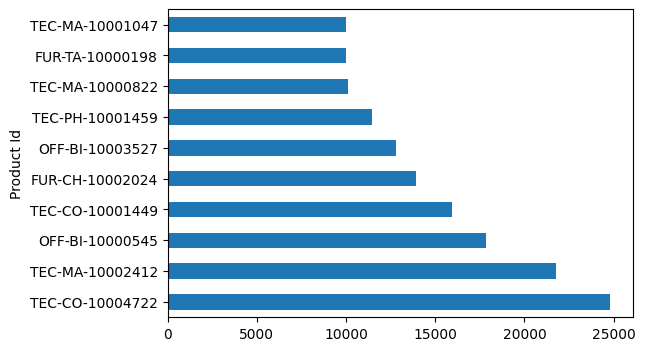

In [20]:
df.groupby('Product Id' )['Totalprofit'].sum(['Totalprofit']).sort_values(ascending=False).head(10).plot(kind='barh',figsize=(6,4))

Top ten product with higest quantity order

In [21]:
df.groupby('Product Id' )['Quantity'].sum(['Quantity']).sort_values(ascending=False).head(10)

Product Id
TEC-AC-10003832    75
OFF-PA-10001970    70
OFF-BI-10001524    67
FUR-CH-10002647    64
OFF-BI-10002026    64
FUR-TA-10001095    61
TEC-AC-10002049    60
OFF-BI-10004728    59
FUR-CH-10003774    59
TEC-AC-10003038    57
Name: Quantity, dtype: int64

top 10 product with the highest ordering price

<Axes: ylabel='Product Id'>

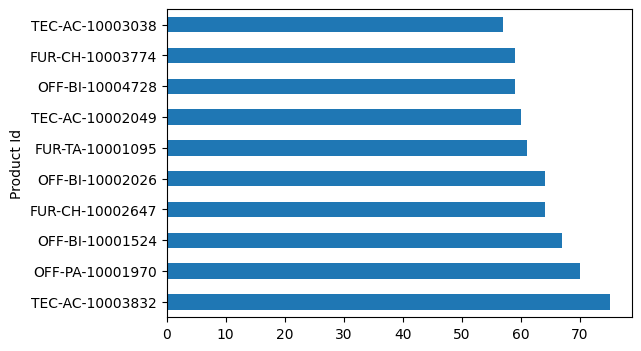

In [22]:
df.groupby('Product Id' )['Quantity'].sum(['Quantity']).sort_values(ascending=False).head(10).plot(kind='barh',figsize=(6,4))

In [23]:
df.groupby('Product Id' )['Sellingprice'].sum(['Sellingprice']).sort_values(ascending=False).head(10)

Product Id
TEC-CO-10004722    59514.0
OFF-BI-10003527    26525.3
TEC-MA-10002412    21734.4
FUR-CH-10002024    21096.2
OFF-BI-10001359    19090.2
OFF-BI-10000545    18249.0
TEC-CO-10001449    18151.2
TEC-MA-10001127    17906.4
OFF-BI-10004995    17354.8
OFF-SU-10000151    16325.8
Name: Sellingprice, dtype: float64

<Axes: ylabel='Product Id'>

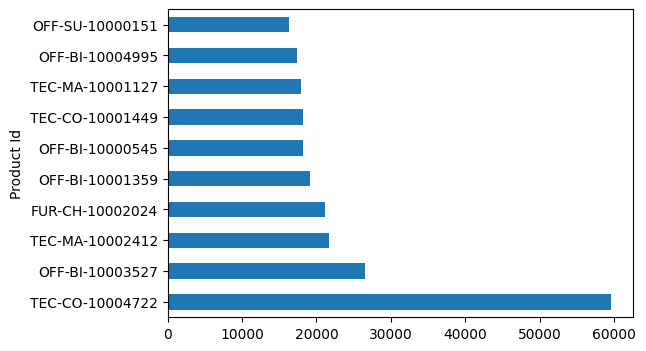

In [24]:
df.groupby('Product Id' )['Sellingprice'].sum(['Sellingprice']).sort_values(ascending=False).head(10).plot(kind='barh',figsize=(6,4))

The top 3 products with the highest profit are
1. TEC-CO-10004722    
2. TEC-MA-10002412    
3. OFF-BI-10000545    
These products have significantly higher profits compared to the other products.

2. The top 3 products with the highest quantity ordered are
1. TEC-AC-10003832       75
2. OFF-PA-10001970        70
3.  OFF-BI-10001524       67
* the maximum quantity order by the product is 75.

4 product with the higest selling price as compared to other product .
1. TEC-CO-10004722    59514.0
2. OFF-BI-10003527    26525.3
3. TEC-MA-10002412    21734.


There is a strong correlation between the products with the highest profit, highest quantity ordered, and highest selling  price.This suggests that these products are the most popular and in-demand among customers.
The company should focus on promoting and marketing these products to further increase sales and profits.



find all the order from the technology category that where ship using second class ship order by the date

In [25]:
df1=df[(df['Category']=='Technology') & (df['Ship Mode']=='Second Class')]
df.head(2)
df1.groupby(['Category','Ship Mode'])['Order Id'].count().sort_values(ascending=False).head(10)


Category    Ship Mode   
Technology  Second Class    366
Name: Order Id, dtype: int64

Analysz the category column

In [26]:
df.groupby(['Category','Ship Mode'])['Order Id'].count().sort_values(ascending=False).head(10)

Category         Ship Mode     
Office Supplies  Standard Class    3635
Furniture        Standard Class    1246
Office Supplies  Second Class      1152
Technology       Standard Class    1081
Office Supplies  First Class        910
Furniture        Second Class       427
Technology       Second Class       366
Furniture        First Class        327
Office Supplies  Same Day           326
Technology       First Class        301
Name: Order Id, dtype: int64

we observed that office category has the higest ordering and they are mostly shipped  with second class ship mode

<Axes: ylabel='Category,Ship Mode'>

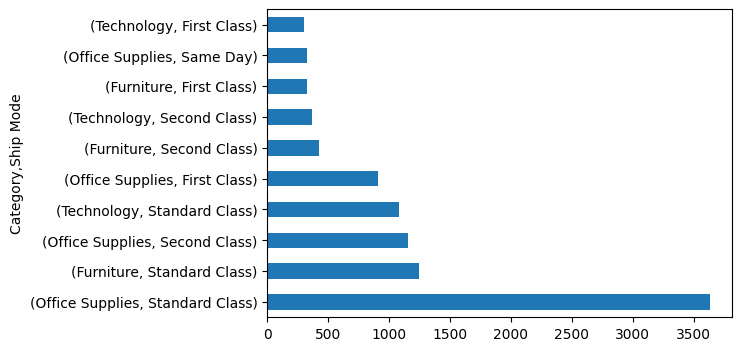

In [27]:
df.groupby(['Category','Ship Mode'])['Order Id'].count().sort_values(ascending=False).head(10).plot(kind='barh',figsize=(6,4))

category with the higest profit

In [28]:
df.groupby('Category')['Totalprofit'].sum().sort_values(ascending=False).head(10)

Category
Technology         379720.7
Furniture          342782.4
Office Supplies    317425.1
Name: Totalprofit, dtype: float64

In [29]:
df.groupby('Category')['Quantity'].sum().sort_values(ascending=False).head(10)

Category
Office Supplies    22906
Furniture           8028
Technology          6939
Name: Quantity, dtype: int64

more quantity are order for the office supplier compared to the furniture and the furniture category generated more profit for the company . this is to say that the furniture are more exppensive comapred to the other category

analysis of the subcategory

In [30]:
df.groupby(['Sub Category', 'Category'])['Totalprofit'].sum().sort_values(ascending=False).reset_index().head(10)

,Sub Category,Category,Totalprofit
0,Chairs,Furniture,153905.7
1,Phones,Technology,139498.5
2,Binders,Office Supplies,98802.8
3,Tables,Furniture,98522.2
4,Storage,Office Supplies,96105.3
5,Machines,Technology,91545.3
6,Accessories,Technology,79412.0
7,Copiers,Technology,69264.9
8,Appliances,Office Supplies,54582.6
9,Bookcases,Furniture,51270.8


1. chair from furniture categrory  generate  153905.7  profit
2. phone from the technology category   generate 139498.5
3. binder from the office supplice generate 98802.8

In [31]:
df.groupby(['Sub Category', 'Category'])['Quantity'].sum().sort_values(ascending=False).reset_index().head(10)

,Sub Category,Category,Quantity
0,Binders,Office Supplies,5974
1,Paper,Office Supplies,5178
2,Furnishings,Furniture,3563
3,Phones,Technology,3289
4,Storage,Office Supplies,3158
5,Art,Office Supplies,3000
6,Accessories,Technology,2976
7,Chairs,Furniture,2356
8,Appliances,Office Supplies,1729
9,Labels,Office Supplies,1400


1. binder  and paper from the  office supplies have more
   quantity supplies
2. furnishing  have a total of 3563 quantity supplies
3. phine have a total of 3289 quantity supplies

<Axes: ylabel='Sub Category'>

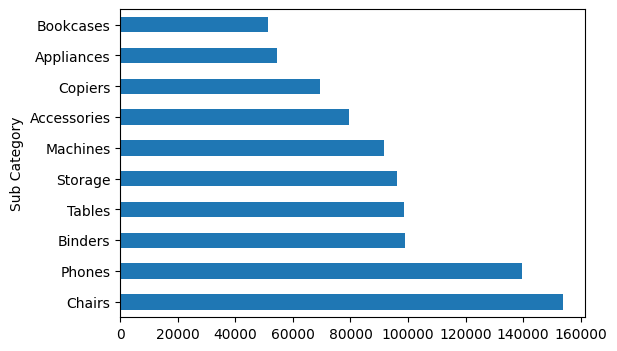

In [32]:
df.groupby('Sub Category')['Totalprofit'].sum().sort_values(ascending=False).head(10).plot(kind='barh',figsize=(6,4))

<Axes: ylabel='Sub Category'>

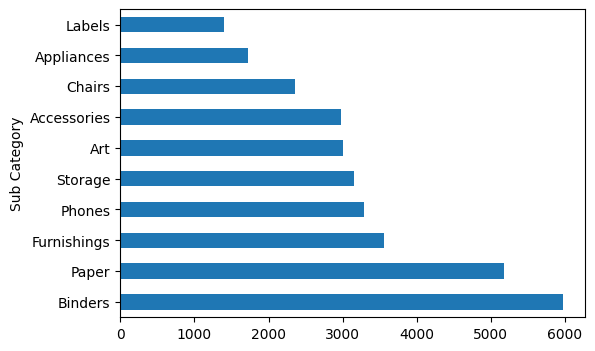

In [33]:
df.groupby('Sub Category')['Quantity'].sum().sort_values(ascending=False).head(10).plot(kind='barh',figsize=(6,4))

In [34]:
df.head(2)

,Order Id,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,...,Quantity,Discount Percent,Sellingprice,Profit,Totalprofit,year,monthname,dayname,month,day
0,1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,...,2,2,254.8,14.8,29.6,2023,March,Wednesday,3,1
1,2,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,...,3,3,708.1,108.1,324.3,2023,August,Tuesday,8,15


Analysis of the segment column

<Axes: ylabel='Segment'>

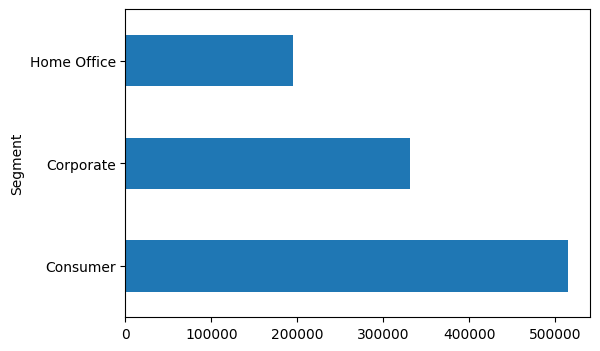

In [35]:
df.groupby('Segment')['Totalprofit'].sum().sort_values(ascending=False).head(10).plot(kind='barh',figsize=(6,4))

1. the  custemer segment generate more profit


ordering by state

In [36]:
df.groupby(['State','City'])['Order Id'].count().sort_values(ascending=False).reset_index().head(10)

,State,City,Order Id
0,New York,New York City,915
1,California,Los Angeles,747
2,Pennsylvania,Philadelphia,537
3,California,San Francisco,510
4,Washington,Seattle,428
5,Texas,Houston,377
6,Illinois,Chicago,314
7,California,San Diego,170
8,Texas,Dallas,157
9,Ohio,Columbus,120


city with higest quantity order

In [37]:
df.groupby('City')[['Quantity','Totalprofit']].sum().sort_values(by='Totalprofit',ascending=False).head(10).reset_index().head(10)

,City,Quantity,Totalprofit
0,New York City,3417,103852.6
1,Los Angeles,2879,73294.8
2,Philadelphia,1981,52619.3
3,Seattle,1590,50765.7
4,San Francisco,1935,48472.6
5,Jacksonville,429,29560.5
6,Houston,1466,27982.9
7,Detroit,441,24813.1
8,San Diego,670,21398.4
9,Springfield,649,20499.1


1. New york city  has the highest quantity of products sold,
  generating a total profit of $10,3852.6

2. Los Angeles has sold a total quantity of 2879  products,
  generating a total profit of $73294.8


   
3. Philadelphia city  has sold a total quantity of 1981 products,
   generating a total profit of $5,2619.3

In [38]:
df.groupby('State')[['Quantity','Totalprofit']].sum().sort_values(by='Totalprofit',ascending=False).reset_index().head(10)

,State,Quantity,Totalprofit
0,California,7667,197269.1
1,New York,4224,128317.1
2,Texas,3724,76009.2
3,Washington,1883,55961.2
4,Pennsylvania,2153,54459.1
5,Florida,1379,53071.3
6,Michigan,946,36757.5
7,Virginia,893,35089.2
8,Indiana,578,33105.7
9,Ohio,1759,31186.0


1. California has the highest quantity of products sold,
  generating a total profit of $197,269.10

2. New York has sold a total quantity of 4,224 products,
   generating a total profit of $128,317.10
   
3. Texas has sold a total quantity of 3,724 products,
   generating a total profit of $76,009.20

In [47]:

df.groupby('Region')[['Quantity','Totalprofit']].sum().sort_values(by='Totalprofit',ascending=False).reset_index()

,Region,Quantity,Totalprofit
0,West,12266,305289.6
1,East,10618,295773.8
2,Central,8780,236121.2
3,South,6209,202743.6


The West region has the highest quantity of orders 12266 and the highest total sales of $305289.6 profit generated from these sales, followed by the East region, which has the next highest quantity of orders and total profit generated.

In [45]:
df.groupby(['Region','Product Id'])['Totalprofit'].sum().sort_values(ascending=False).reset_index().head(10)

,Region,Product Id,Totalprofit
0,South,TEC-MA-10002412,21746.4
1,Central,TEC-CO-10004722,14875.0
2,Central,OFF-BI-10000545,13247.5
3,East,TEC-CO-10001449,10068.0
4,East,TEC-MA-10001047,9989.0
5,East,FUR-CH-10002024,9249.6
6,Central,TEC-MA-10000822,8939.8
7,South,TEC-PH-10001459,8822.1
8,South,FUR-TA-10000198,8689.9
9,East,TEC-CO-10004722,8261.0


The South region has the highest sales of product TEC-MA-10002412, generating a profit of
$21,746.40,




followed by the Central region, which has significant sales
of product OFF-BI-10000545, with total sales of $13,247.50. This indicates that these products are sold more in the South and Central regions. Therefore, the company should focus more on these regions to generate more profit.

In [44]:
df.groupby(['Region','Product Id'])['Quantity'].sum().sort_values(ascending=False).reset_index().head(10)

,Region,Product Id,Quantity
0,West,TEC-AC-10003832,45
1,Central,OFF-BI-10000301,34
2,Central,OFF-BI-10000756,33
3,East,OFF-PA-10001970,33
4,East,OFF-BI-10003656,32
5,West,OFF-BI-10000174,32
6,West,OFF-BI-10001036,31
7,East,OFF-FA-10000621,31
8,East,FUR-FU-10004848,31
9,East,OFF-ST-10002615,29


In [58]:
df.groupby(['Region','Order Id'])['Quantity'].sum().sort_values(ascending=False).reset_index().head(10).reset_index()

,index,Region,Order Id,Quantity
0,0,West,576,14
1,1,Central,9516,14
2,2,South,6489,14
3,3,Central,661,14
4,4,West,2948,14
5,5,Central,1046,14
6,6,West,3903,14
7,7,Central,7388,14
8,8,South,1434,14
9,9,West,1364,14


A higher quantity of goods is ordered in the Western region, with product TEC-AC-10003832 having the highest order quantity of 45. This is followed by the Central region, where products OFF-BI-10000301 and OFF-BI-10000756 have order quantities of 34 and 33, respectively.

top  10 order by month

In [75]:
df.groupby('monthname')['Order Id'].count().sort_values(ascending=False).head(10).reset_index()

,monthname,Order Id
0,July,905
1,October,861
2,August,858
3,January,858
4,December,852
5,April,848
6,November,836
7,March,835
8,May,821
9,February,800


<Axes: ylabel='monthname'>

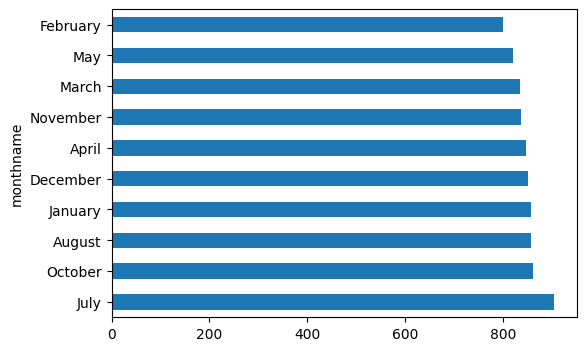

In [60]:
df.groupby('monthname')['Order Id'].count().sort_values(ascending=False).head(10).plot(kind='barh',figsize=(6,4))

July, October, and August are the months with the highest order quantities, having respective order values of 905, 861, and 858. This indicates that most orders are placed during these months. Therefore, the company should focus more on advertising and offering proper discounts during these months to boost sales further.

Top 10 quantity order by month

In [74]:
df.groupby('monthname')['Quantity'].sum().sort_values(ascending=False).head(10).reset_index()

,monthname,Quantity
0,July,3423
1,October,3371
2,August,3348
3,December,3249
4,May,3200
5,January,3193
6,April,3149
7,March,3098
8,February,3085
9,November,3055


Top 10 Totalsale by month

In [73]:
df.groupby('monthname')['Totalprofit'].sum().sort_values(ascending=False).head(10).reset_index()

,monthname,Totalprofit
0,October,117886.1
1,February,114579.9
2,August,106832.7
3,April,92432.4
4,January,86046.8
5,December,82080.7
6,September,76927.5
7,May,76263.4
8,November,72360.2
9,July,71862.1


<Axes: ylabel='monthname'>

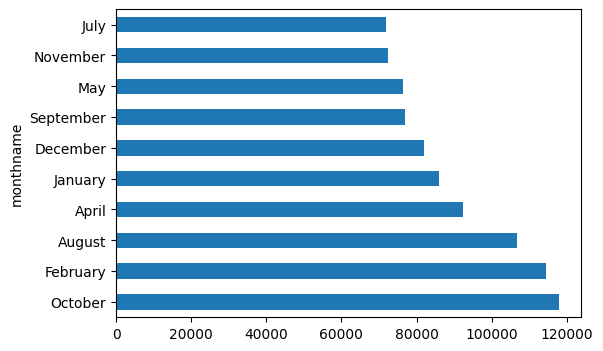

In [63]:
df.groupby('monthname')['Totalprofit'].sum().sort_values(ascending=False).head(10).plot(kind='barh',figsize=(6,4))

October, February, and August are the months where the company generates the most profit, with respective profits of $117,886.10
$114,579.90, and $106,832.70. The company should focus on these months by offering discounts, placing more advertisements, and providing promotions to attract more clients and increase sales.

top 10 order by day

In [71]:
df.groupby('dayname')['Order Id'].count().sort_values(ascending=False).head(10).reset_index()

,dayname,Order Id
0,Tuesday,1482
1,Saturday,1451
2,Thursday,1438
3,Wednesday,1414
4,Friday,1407
5,Monday,1402
6,Sunday,1400


In [70]:
df.groupby('dayname')['Totalprofit'].sum().sort_values(ascending=False).head(10).reset_index()

,dayname,Totalprofit
0,Sunday,166094.0
1,Friday,158337.9
2,Monday,153817.6
3,Saturday,152133.8
4,Tuesday,149070.8
5,Wednesday,132732.9
6,Thursday,127741.2


yearly quanterly sales

More profit is generated on Sundays and Fridays, with respective values of $166,094.00, $158,337.90, and $153,817.60. This indicates that most products are sold on weekends and at the beginning of the week. The company should offer more discounts during the week to attract more sales on weekends.

In [82]:
df['Quater']=df['month'].apply(lambda x: 'Q1' if x in [1,2,3] else ('Q2' if x in [4,5,6] else ('Q3' if x in [7,8,9] else 'Q4')))
df.head(2)

,Order Id,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,...,Sellingprice,Profit,Totalprofit,year,monthname,dayname,month,day,Quanter,Quater
0,1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,...,254.8,14.8,29.6,2023,March,Wednesday,3,1,Q1,Q1
1,2,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,...,708.1,108.1,324.3,2023,August,Tuesday,8,15,Q3,Q3


In [89]:
pivot_table = df.pivot_table(index='Quater', columns='year', values='Quantity', aggfunc='sum')
pivot_table

year,2022,2023
Quater,,
Q1,4608,4768
Q2,4815,4484
Q3,4756,4767
Q4,4897,4778


A higher quantity of goods is sold in the fourth quarter of the year, from September to December, during the festive period. Therefore, more promotions should be offered in the fourth quarter to boost sales further.

In [90]:
pivot_table = df.pivot_table(index='Quater', columns='year', values='Totalprofit', aggfunc='sum')
pivot_table

year,2022,2023
Quater,,
Q1,124897.6,147136.2
Q2,119586.7,120358.4
Q3,138857.8,116764.5
Q4,133729.2,138597.8


In [102]:
pivot_table = df.pivot_table(index='month', columns='year', values='Totalprofit', aggfunc='sum').reset_index()
pivot_table

year,month,2022,2023
0,1,43521.3,42525.5
1,2,47461.1,67118.8
2,3,33915.2,37491.9
3,4,42620.9,49811.5
4,5,35745.5,40517.9
5,6,41220.3,30029.0
6,7,35938.4,35923.7
7,8,61852.4,44980.3
8,9,41067.0,35860.5
9,10,50857.8,67028.3


In [106]:
pivot_table['yoy_growth']=pivot_table[2022]-pivot_table[2023]
pivot_table['yoy_growth']


0       995.8
1    -19657.7
2     -3576.7
3     -7190.6
4     -4772.4
5     11191.3
6        14.7
7     16872.1
8      5206.5
9    -16170.5
10    15659.0
11    -4357.1
Name: yoy_growth, dtype: float64

In [107]:
pivot_table

year,month,2022,2023,yoy_growth
0,1,43521.3,42525.5,995.8
1,2,47461.1,67118.8,-19657.7
2,3,33915.2,37491.9,-3576.7
3,4,42620.9,49811.5,-7190.6
4,5,35745.5,40517.9,-4772.4
5,6,41220.3,30029.0,11191.3
6,7,35938.4,35923.7,14.7
7,8,61852.4,44980.3,16872.1
8,9,41067.0,35860.5,5206.5
9,10,50857.8,67028.3,-16170.5


Observation and conclusion

1. The company should focus more on the following three products, as they have the highest selling prices and quantities ordered: TEC-CO-10004722, TEC-MA-10002412, and OFF-BI-10000545. Special emphasis should be placed on the Furniture and Technology categories since they generate high income or profit for the company. Within these categories, the subcategories to prioritize are Chairs from Furniture, which generate the most sales, and Phones from Technology. Additionally, Binders, which also generate significant sales, should be a focus.
2. Geographically, more focus should be on New York, California, and Texas, as these states generate the most sales and profit. Specifically, New York City and Los Angeles are the cities with the highest sales or profit for the company.
3. Furthermore, the company should concentrate on the West and East regions, as these regions generate more sales due to high product demand.

4. October, February, and August stand out as the months when the company achieves the highest profits, with respective figures of $117,886.10, $114,579.90, and $106,832.70. To capitalize on this trend, the company should concentrate efforts on offering discounts, increasing advertising presence, and launching promotions during these months to attract more clients and boost sales.

5. Additionally, the company should pay close attention to specific days of the week, as Sundays and Fridays see the highest sales. This highlights a trend where most sales occur over weekends. Therefore, implementing more attractive discounts and promotions during weekdays could potentially draw in more sales and increase profits.

6. Moreover, the fourth quarter of the year, spanning from September through December, experiences higher sales. This period coincides with the festive season, suggesting that increased advertising, promotions, and discounts during these months can further amplify sales.

7. By strategically focusing efforts during these peak periods and adjusting marketing strategies accordingly, the company can effectively enhance overall sales performance and profitability.